In [5]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime
from itables import init_notebook_mode, options, show
init_notebook_mode(all_interactive=True)
options.allow_html = True  

start_date = '2018-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

### Market Analysis

In [ ]:


# ----------------------------
# Index ETFs (Vanguard + Major Benchmarks)
# ----------------------------
index_etf_dict = {
    # Major Benchmarks
    "DIA": "Dow Jones",
    "QQQ": "Nasdaq 100",
    "VOO": "S&P 500 (Vanguard)",
    "VTWO": "Russell 2000 (Vanguard)",
    "VTI": "Total US Market",
    "VT": "Total World",
    "VEA": "Developed Markets",
    "VWO": "Emerging Markets",
    "BND": "Total Bond Market",
    # Style ETFs
    "VOOG": "Growth (Vanguard)",
    "VOOV": "Value (Vanguard)",
    # Sector ETFs
    "VGT": "Technology",
    "VFH": "Financials",
    "VDE": "Energy",
    "VCR": "Consumer Discretionary",
    "VDC": "Consumer Staples",
    "VHT": "Health Care",
    "VIS": "Industrials",
    "VPU": "Utilities",
    "VNQ": "Real Estate",
    "VAW": "Materials",
    # Factor ETFs
    "VFVA": "Value",
    "VFMO": "Momentum",
    "VFMF": "Multi-Factor",
    "VFMV": "Minimum Volatility",
    "VFQY": "Quality",
    # Commodities
    'GLD': 'Gold',
    'SLV': 'Silver',
    'USO': 'Oil',
    'UNG': 'Natural Gas',
    # Actively Managed Funds, Alpha
    "VMNIX": "Vanguard Market Neutral Fund",
    'VSGAX': "Vanguard Small-Cap Growth Index Fund Admiral Shares",
    "VSTCX": "Vanguard Strategic Small-Cap Equity Fund",
    "VSEQX": "Vanguard Strategic Equity Fund",
    "VEXPX": "Vanguard Explorer Fund",
    "VAGEIGI": "UK Global Equity Income Fund",
    "VEIPX": "Vanguard Equity Income Fund",
    "VUGRX": "Vanguard U.S. Growth Fund"  # Note: advisory role changed
}

# ----------------------------
# ETF Type Mapping
# ----------------------------
etf_type_dict = {
    # Broad Market
    "VOO": "Broad Market",
    "VTWO": "Broad Market",
    "VTI": "Broad Market",
    "VT": "Broad Market",
    "DIA": "Broad Market",
    "QQQ": "Broad Market",
    "VEA": "Broad Market",
    "VWO": "Broad Market",

    # Bonds
    "BND": "Bond",

    # Style
    "VOOG": "Style",
    "VOOV": "Style",

    # Sectors
    "VGT": "Sector",
    "VFH": "Sector",
    "VDE": "Sector",
    "VCR": "Sector",
    "VDC": "Sector",
    "VHT": "Sector",
    "VIS": "Sector",
    "VPU": "Sector",
    "VNQ": "Sector",
    "VAW": "Sector",

    # Factor ETFs
    "VFVA": "Factor",
    "VFMO": "Factor",
    "VFMF": "Factor",
    "VFMV": "Factor",
    "VFQY": "Factor",
    # Commodities
    "GLD": "Commodities",
    "SLV": "Commodities",
    "USO": "Commodities",
    "UNG": "Commodities",
    # Alpha Funds
    "VMNIX": "Alpha Fund",
    "VSGAX": "Alpha Fund",
    "VSEQX": "Alpha Fund",
    "VSTCX": "Alpha Fund",
    "VEXPX": "Alpha Fund",
    "VUGRX": "Alpha Fund",
    "VAGEIGI": "Alpha Fund",
    "VEIPX": "Alpha Fund"
}

index_etfs = list(index_etf_dict.keys())

# ----------------------------
# Download adjusted close prices
# ----------------------------
data = yf.download(index_etfs, start=start_date, end=end_date, progress=False)["Close"]

# Drop ETFs that didn't return data
data = data.dropna(axis=1, how="all")

# ----------------------------
# Define lookback periods
# ----------------------------
periods = {
    "Daily": 1,
    "Monthly": 21,
    "Quarterly": 63,
    "Semiannual": 126,
    "Annual": 252,
    "3-Year": 756,
    "5-Year": 1260
}

# ----------------------------
# Compute % returns
# ----------------------------
performance = {}
for label, days in periods.items():
    if days < len(data):
        performance[label] = data.pct_change(periods=days).iloc[-1] * 100
    else:
        performance[label] = pd.Series([None] * data.shape[1], index=data.columns)

# ----------------------------
# Create DataFrame
# ----------------------------
perf_df = pd.DataFrame(performance, index=data.columns)
perf_df["Index"] = [index_etf_dict.get(ticker, ticker) for ticker in perf_df.index]
perf_df["Ticker"] = perf_df.index
perf_df["Type"] = [etf_type_dict.get(ticker, "Other") for ticker in perf_df.index]

# Reorder columns
perf_df = perf_df[["Index", "Ticker", "Type"] + list(periods.keys())]


type_colors = {
    "Broad Market": "#1f77b4",   # dark blue
    "Bond": "#2ca02c",           # dark green
    "Style": "#b8860b",          # dark goldenrod
    "Sector": "#d62728",         # dark red
    "Factor": "#6a0dad",         # dark purple
    "Other": "#4682b4"           # steel blue
}

def color_type(t):
    return f'<div style="background-color:{type_colors.get(t, "grey")}; color:white; padding:2px">{t}</div>'

#perf_df_colored = perf_df_sorted.copy()
perf_df_colored = perf_df.copy()
perf_df_colored["Type"] = perf_df_colored["Type"].apply(color_type)

show(perf_df_colored.round(2))

/var/folders/c0/_b6c00gj3x56bbmcgtgs73gr0000gn/T/ipykernel_92661/4012329455.py:107: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(index_etfs, start=start_date, end=end_date, progress=False)["Close"]
HTTP Error 404: 

1 Failed download:
['VUGRX']: YFTzMissingError('possibly delisted; no timezone found')


Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


### Sectors

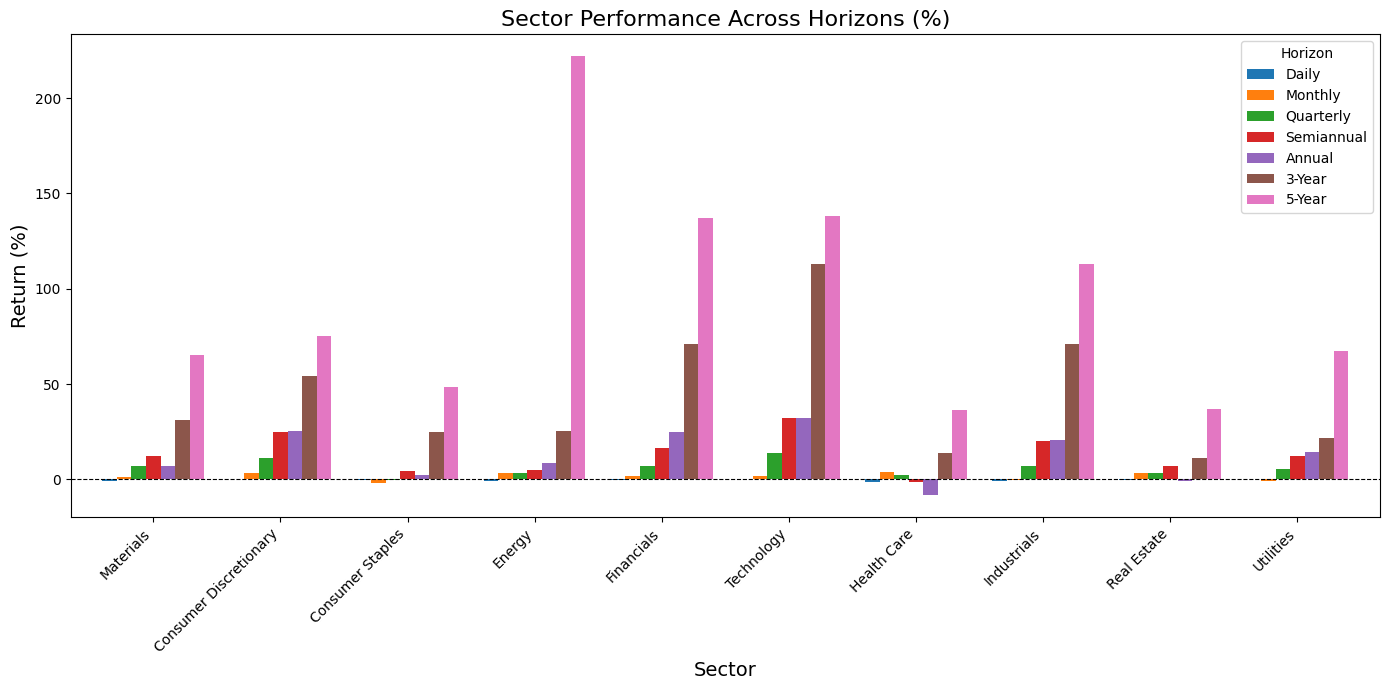

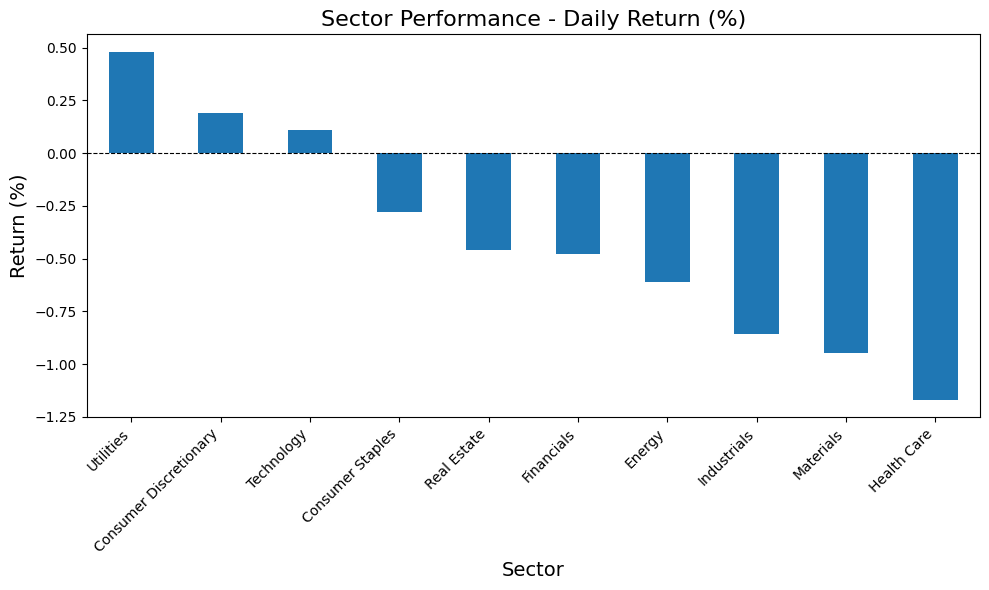

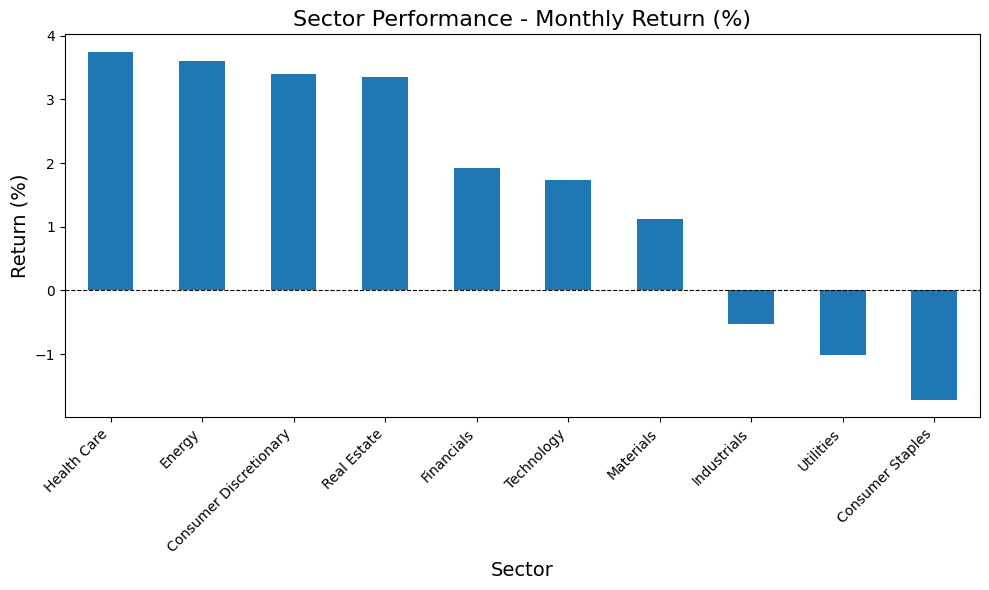

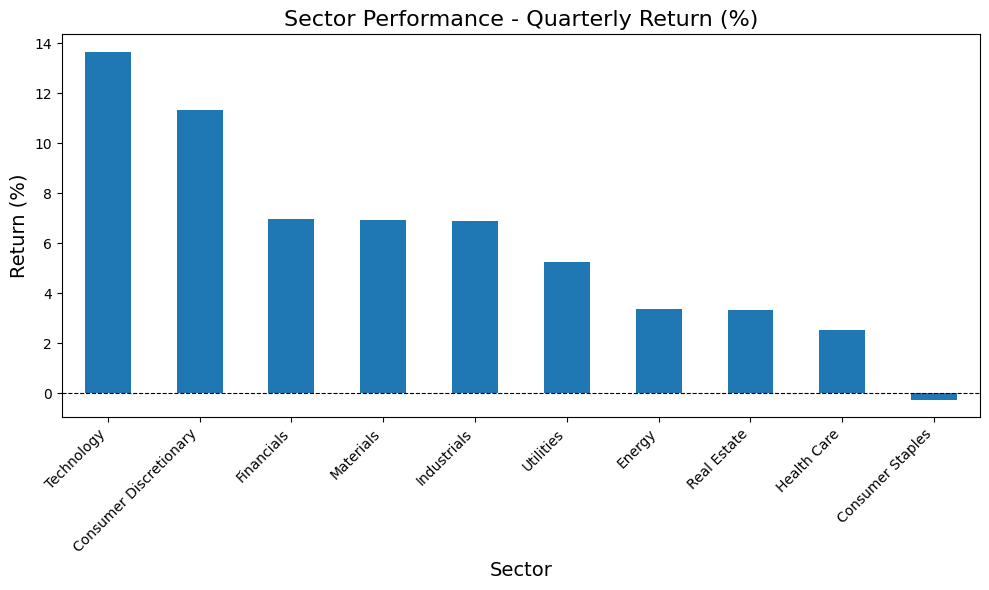

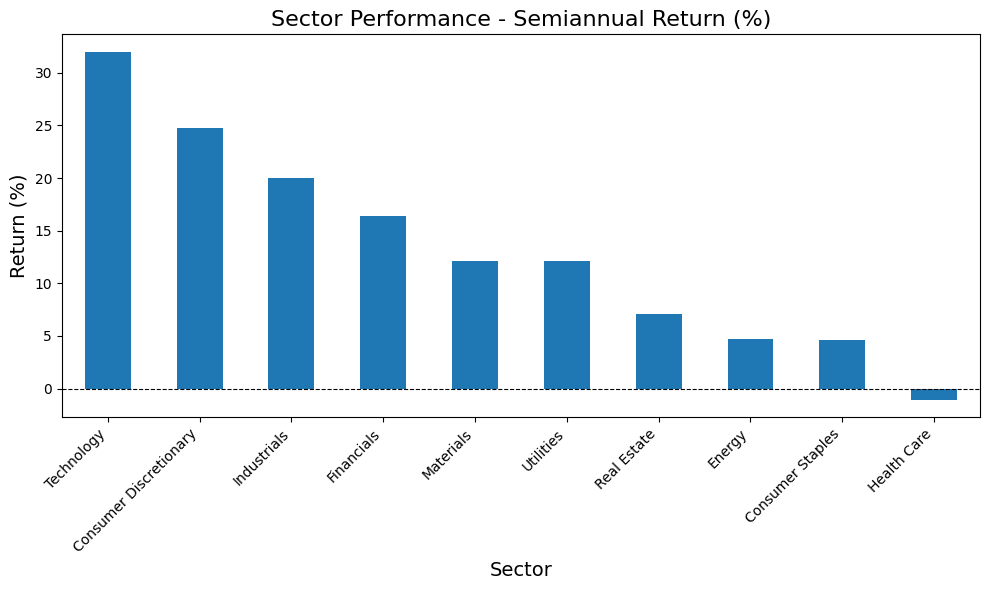

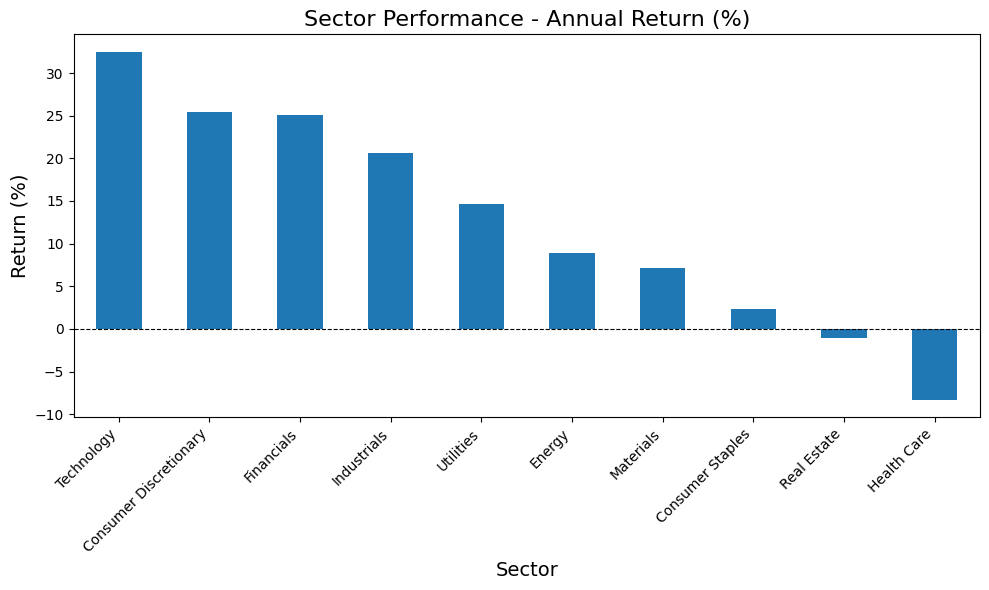

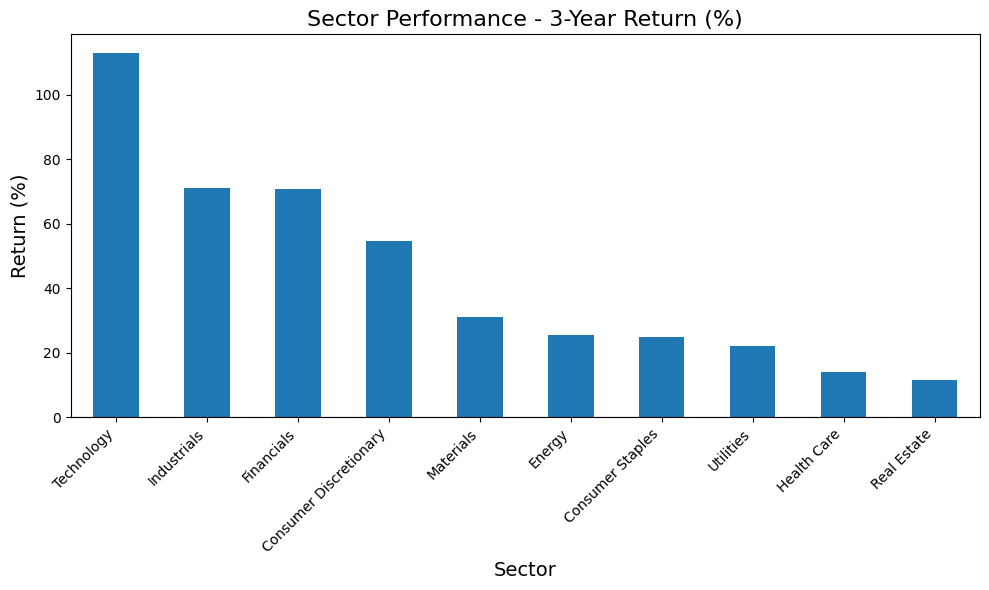

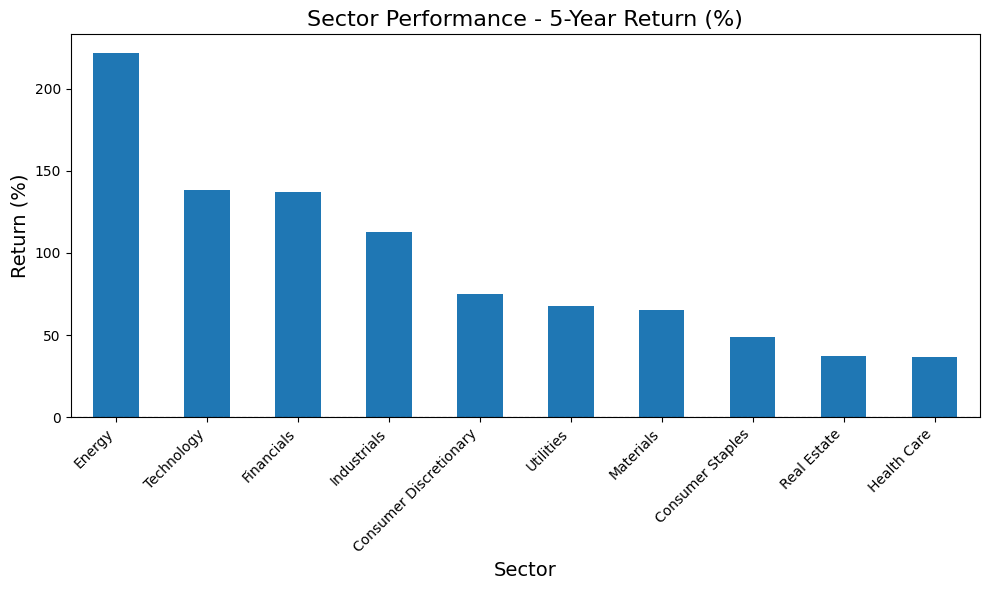

In [12]:
# keep only sectors
perf_df_sectors = perf_df[perf_df["Type"] == "Sector"].set_index("Index")
perf_df_sectors = perf_df_sectors.drop(columns=["Ticker", "Type"]).round(2)

# periods to plot
plot_periods = ["Daily", "Monthly", "Quarterly", "Semiannual", "Annual", "3-Year", "5-Year"]

# subset only those columns
df_plot = perf_df_sectors[plot_periods]

# plot grouped bar chart
ax = df_plot.plot(
    kind="bar",
    figsize=(14, 7),
    width=0.8
)

ax.set_title("Sector Performance Across Horizons (%)", fontsize=16)
ax.set_ylabel("Return (%)", fontsize=14)
ax.set_xlabel("Sector", fontsize=14)
ax.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Horizon", fontsize=10)
plt.tight_layout()
plt.show()

for p in plot_periods:
    # sort by each period
    df_plot = perf_df_sectors.sort_values(by=p, ascending=False)

    # bar plot
    ax = df_plot[p].plot(
        kind="bar",
        figsize=(10,6),
        color="#1f77b4"
    )
    ax.set_title(f"Sector Performance - {p} Return (%)", fontsize=16)
    ax.set_ylabel("Return (%)", fontsize=14)
    ax.set_xlabel("Sector", fontsize=14)
    ax.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

### Factors

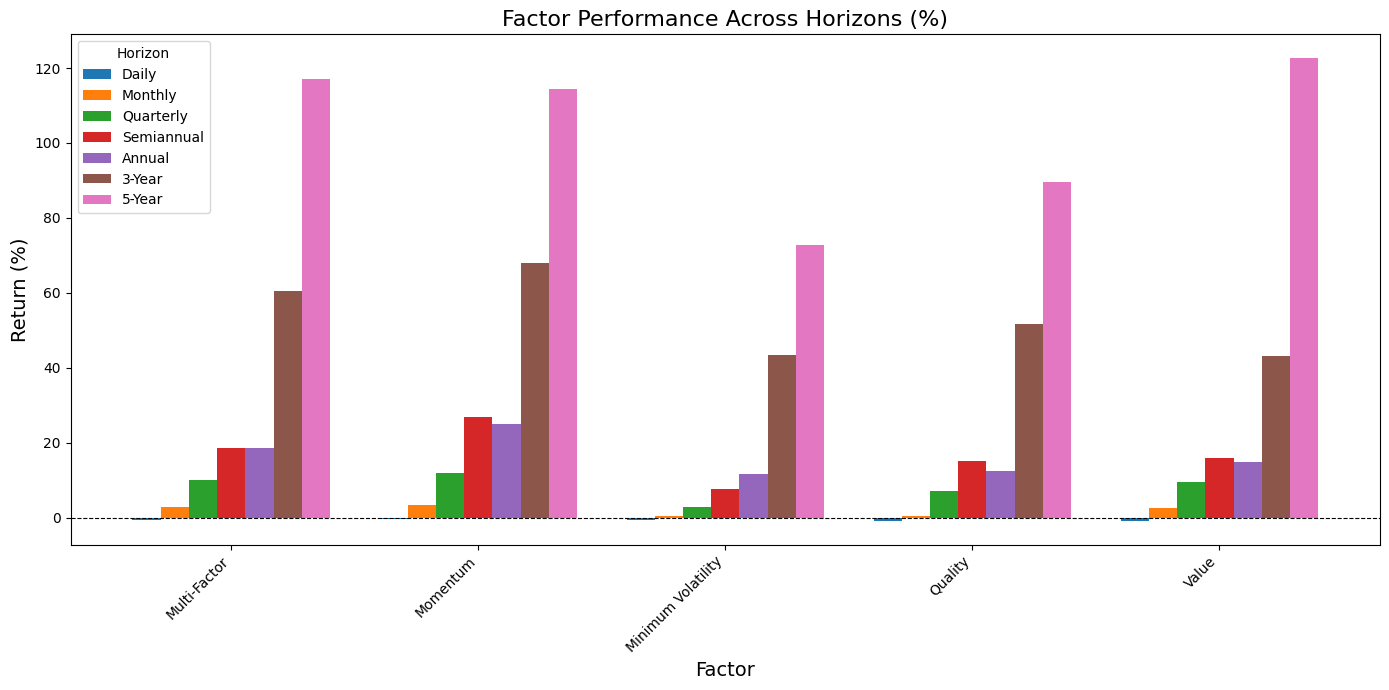

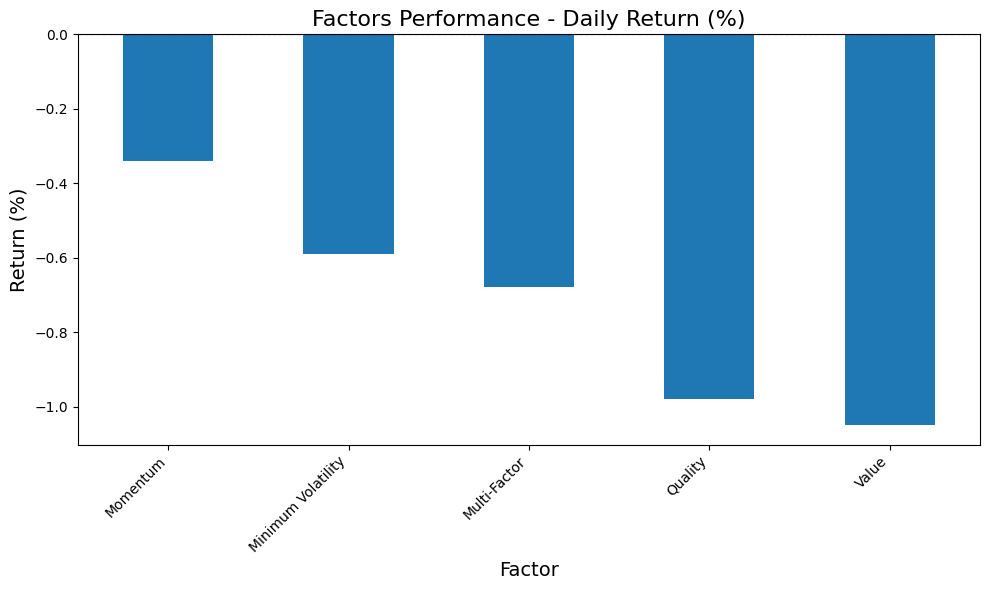

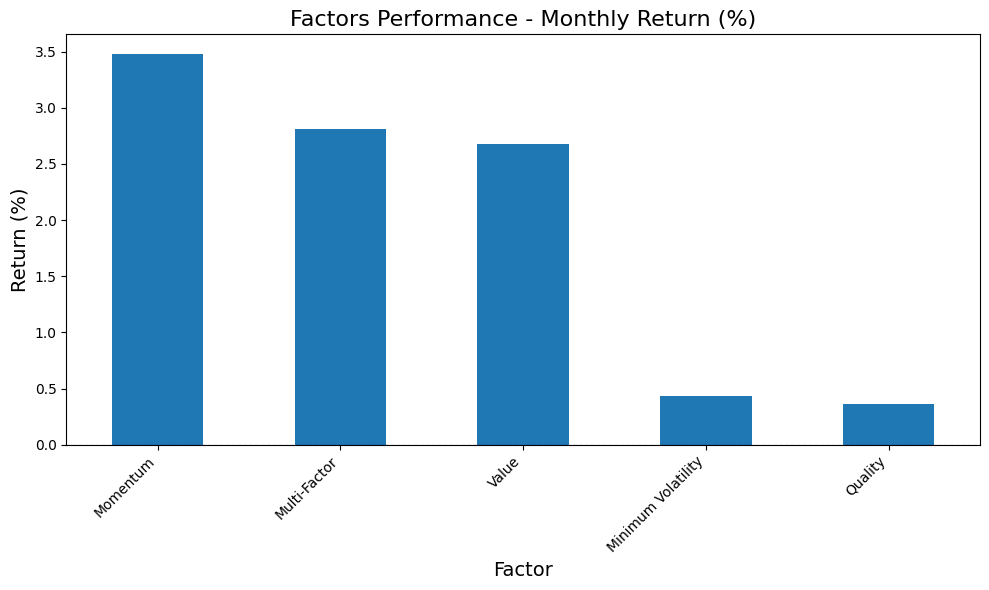

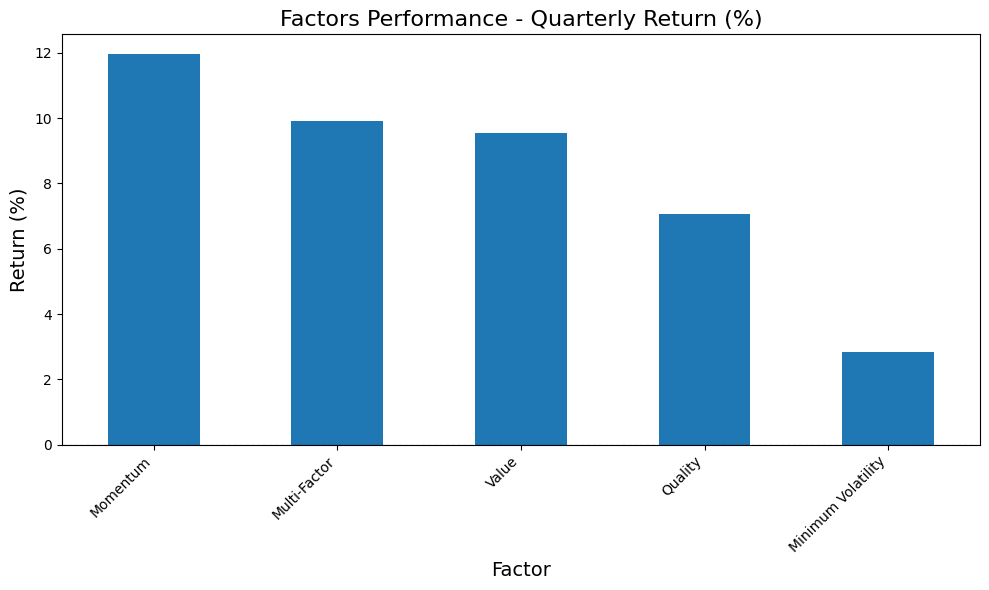

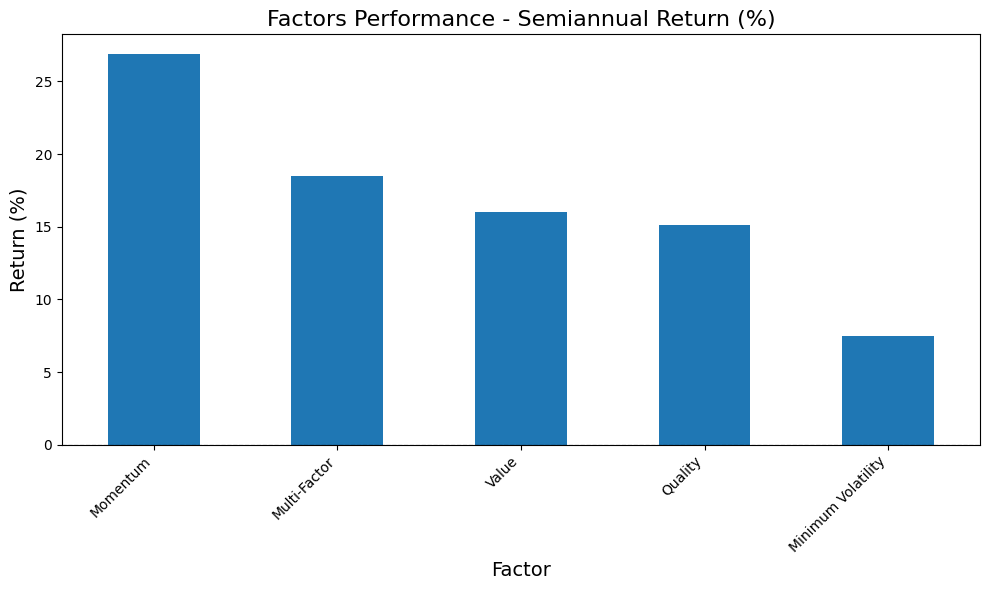

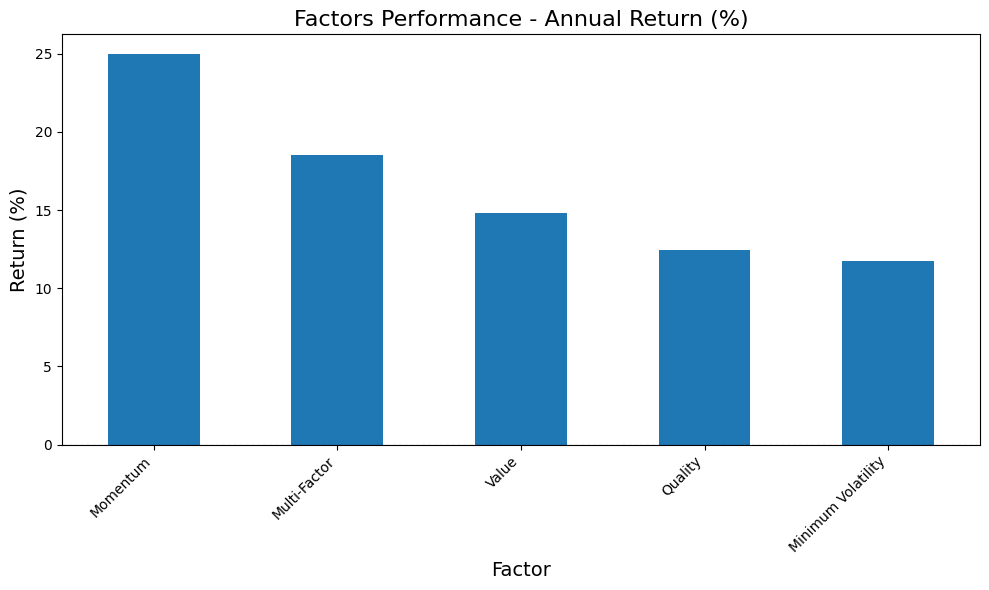

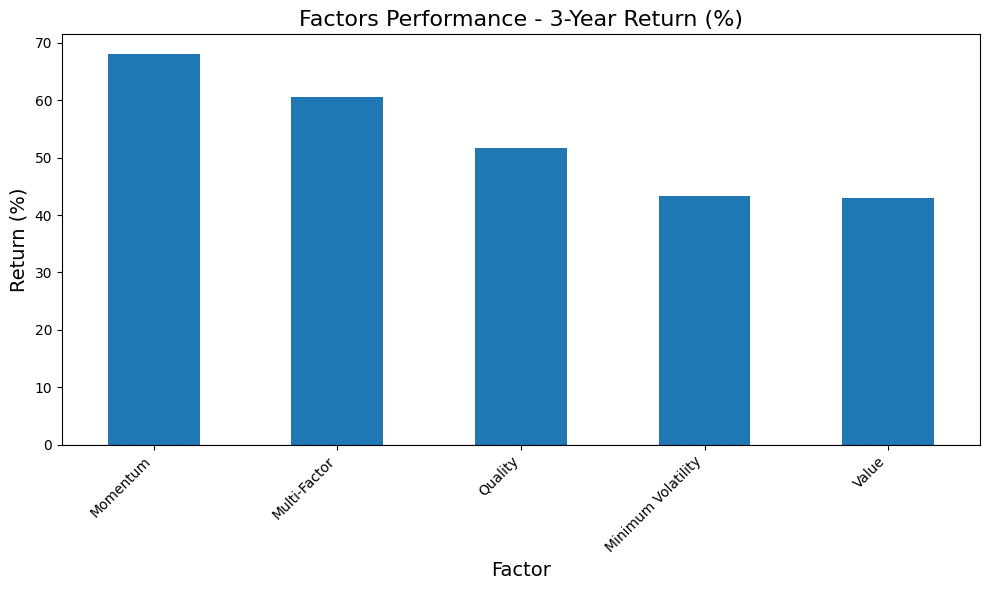

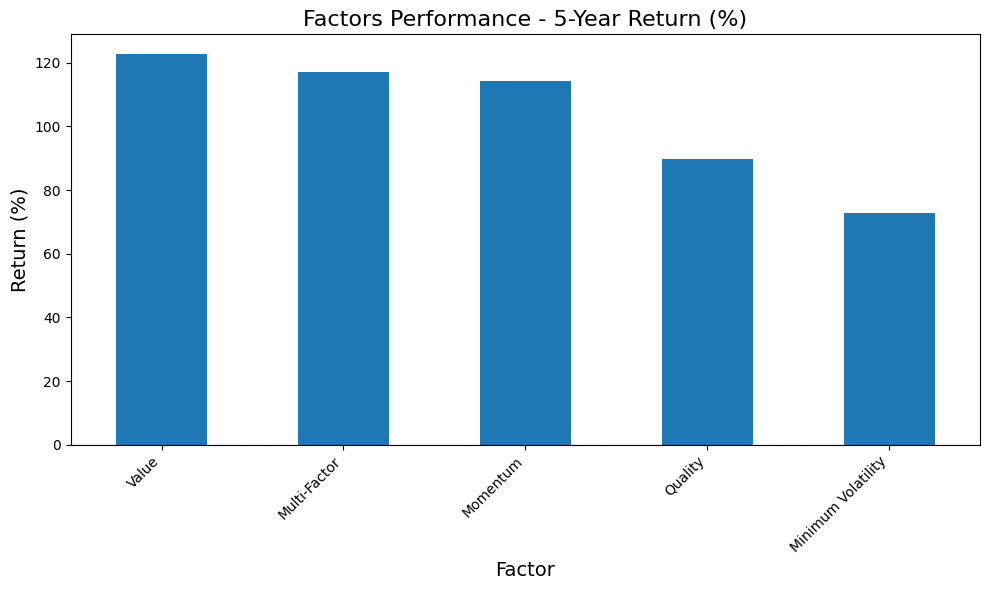

In [8]:
# pick only factors
perf_df_factors = perf_df[perf_df["Type"] == "Factor"].set_index("Index")
perf_df_factors = perf_df_factors.drop(columns=["Ticker", "Type"]).round(2)

# periods to plot
plot_periods = ["Daily", "Monthly", "Quarterly", "Semiannual", "Annual", "3-Year", "5-Year"]

# subset only those columns
df_plot = perf_df_factors[plot_periods]

# plot grouped bar chart
ax = df_plot.plot(
    kind="bar",
    figsize=(14, 7),
    width=0.8
)

ax.set_title("Factor Performance Across Horizons (%)", fontsize=16)
ax.set_ylabel("Return (%)", fontsize=14)
ax.set_xlabel("Factor", fontsize=14)
ax.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Horizon", fontsize=10)
plt.tight_layout()
plt.show()

for p in plot_periods:
    # sort by each period
    df_plot = perf_df_factors.sort_values(by=p, ascending=False)

    # bar plot
    ax = df_plot[p].plot(
        kind="bar",
        figsize=(10,6),
        color="#1f77b4"
    )
    ax.set_title(f"Factors Performance - {p} Return (%)", fontsize=16)
    ax.set_ylabel("Return (%)", fontsize=14)
    ax.set_xlabel("Factor", fontsize=14)
    ax.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


#### Stocks Performance

In [6]:
from IPython.display import display

stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'IBM']

# Download daily closing prices
data = yf.download(stocks, start=start_date, end=end_date, progress=False)['Close']

# Define periods (in trading days)
periods = {
    "Daily": 1,
    "Monthly": 21,
    "Quarterly": 63,
    "Semiannual": 126,
    "Annual": 252,
    "3-Year": 756
}

# Calculate returns for each period
performance = {}
for label, days in periods.items():
    perf = data.pct_change(periods=days).iloc[-1] * 100
    performance[label] = perf

# Create DataFrame
perf_df = pd.DataFrame(performance, index=stocks)
perf_df['Ticker'] = perf_df.index
perf_df = perf_df[['Ticker'] + list(periods.keys())]

print("Stock Returns (%):")
display(perf_df)

/var/folders/c0/_b6c00gj3x56bbmcgtgs73gr0000gn/T/ipykernel_82988/149313442.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start=start_date, end=end_date, progress=False)['Close']


Stock Returns (%):


Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)


#### FX

In [13]:
forex_tickers = {
	"USDINR=X": "Indian Rupee",
    "USDEUR=X": "Euro",
    "USDJPY=X": "Japanese Yen",
    "USDGBP=X": "British Pound",
    "USDCAD=X": "Canadian Dollar",
    "USDCHF=X": "Swiss Franc",
    "USDAUD=X": "Australian Dollar",
    "USDCNY=X": "Chinese Yuan"
}

# Download more frequent data and drop NaN rows
data = yf.download(list(forex_tickers.keys()), period="1d", interval="1d")['Close'].dropna().iloc[-1]

conversion_df = pd.DataFrame({
    "Currency": [forex_tickers[ticker] for ticker in forex_tickers],
    "USD to": [ticker[-3:] for ticker in forex_tickers],
    "Rate": [data.get(ticker, None) for ticker in forex_tickers]
})

print("USD Conversion Rates:")
display(conversion_df)

/var/folders/c0/_b6c00gj3x56bbmcgtgs73gr0000gn/T/ipykernel_92661/2280099034.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(forex_tickers.keys()), period="1d", interval="1d")['Close'].dropna().iloc[-1]
[*********************100%***********************]  8 of 8 completed

USD Conversion Rates:


Loading ITables v2.5.2 from the init_notebook_mode cell... (need help?)
